<a href="https://colab.research.google.com/github/jesh09/open_cv_task/blob/master/opencv_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files 
files.upload()

Saving sample_image.png to sample_image.png


{'sample_image.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x96\x00\x00\x01s\x08\x03\x00\x00\x01\xc4J\x89\x02\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x02\xfdPLTE\xff\xff\xff\xfd\xfd\xfd\xfc\xfc\xfc\xfe\xfe\xfe\xfb\xfb\xfb\xfa\xfa\xfa\xf9\xf9\xf9\xf6\xf6\xf6\xf3\xf3\xf3\xf4\xf4\xf4\xf7\xf7\xf7\xf1\xf1\xf1\xf2\xf2\xf2\xf5\xf5\xf5\xf8\xf8\xf8\xf0\xf0\xf0\xef\xef\xef\xbd\xbd\xbd\x99\x99\x99mmmQQQZZZYYY[[[___ccceeedddbbb^^^SSSRRRUUUVVVTTTXXX\\\\\\]]]```PPPWWWaaafffgggoootttssspppuuulllkkkLLLJJJIIIHHHDDDAAAxxxyyyzzzwwwvvvrrrnnnqqq{{{jjjNNN\x7f\x7f\x7f~~~\x82\x82\x82\x84\x84\x84|||}}}\x80\x80\x80\x81\x81\x81\x85\x85\x85\x88\x88\x88\x83\x83\x83\x86\x86\x86iii\x8a\x8a\x8a\x87\x87\x87hhhOOOMMMKKK\xdd\xdd\xdd\xcc\xcc\xcc===BBB999888FFF@@@666111333+++%%%\x1d\x1d\x1d,,,CCC\x95\x95\x95\x97\x97\x97\x94\x94\x94\x93\x93\x93\x92\x92\x92\x91\x91\x91\x96\x96\x96\x8d\x8d\x8d\x8b\x8b\x8b\x8e\x8e\x8e\x8f\x8f\x8f\x8c\x8c\x8c\x90\x90\x90GGG\xa

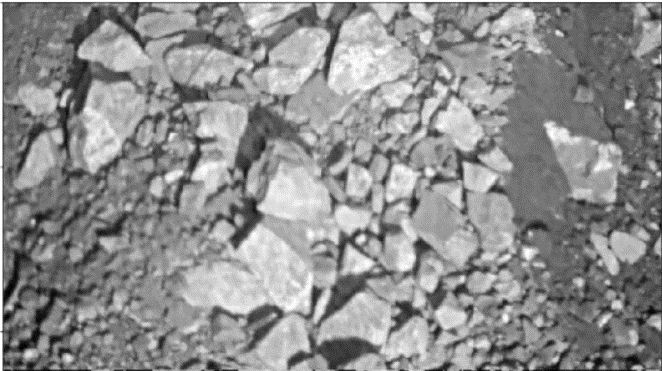

In [17]:
import numpy as np
import cv2
img = cv2.imread("sample_image.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img)
orignal_img = img

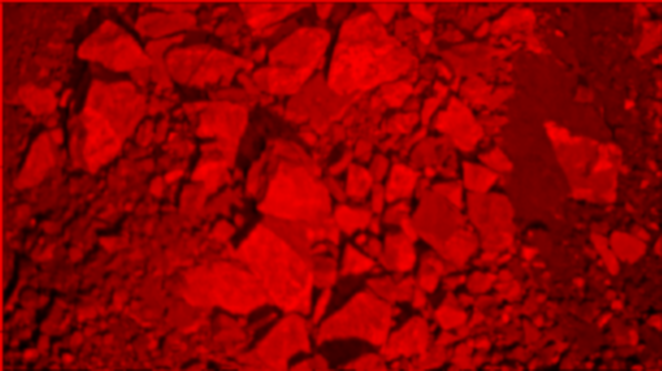

In [18]:
img = cv2.GaussianBlur(img,(5,5),0)
b2r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_blur = cv2.cvtColor(b2r, cv2.COLOR_RGB2HSV)
cv2_imshow(hsv_blur)

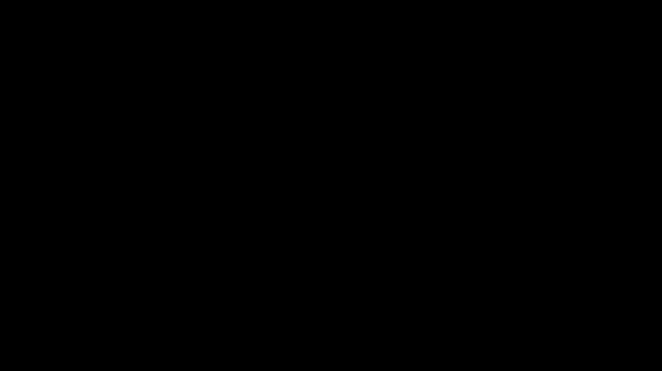

In [19]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
mask = cv2.inRange(hsv_blur, light_orange, dark_orange)
result = cv2.bitwise_and(b2r, b2r, mask=mask)
cv2_imshow(result)


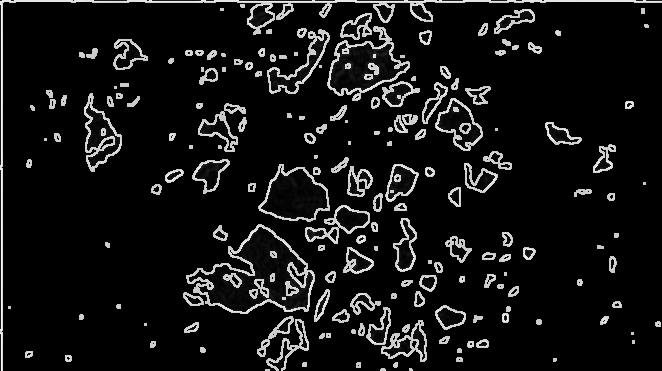

In [20]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)
mask_white = cv2.inRange(hsv_blur, light_white, dark_white)
result_white = cv2.bitwise_and(b2r, b2r, mask=mask_white)
final_mask = mask + mask_white
final_result = cv2.bitwise_and(b2r, b2r, mask=final_mask)


kernel = np.ones((3,3),np.uint8)
# erosion = cv2.erode(final_result,kernel,iterations = 1)
# dilation = cv2.dilate(final_result,kernel,iterations = 1)
# opening = cv2.morphologyEx(final_result, cv2.MORPH_OPEN, kernel)
gradient = cv2.morphologyEx(final_result, cv2.MORPH_GRADIENT, kernel)

cv2_imshow(gradient)

In [0]:
imgray = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
allarea = []
for i in range(len(contours)):
  allarea.append(cv2.contourArea(contours[i]))


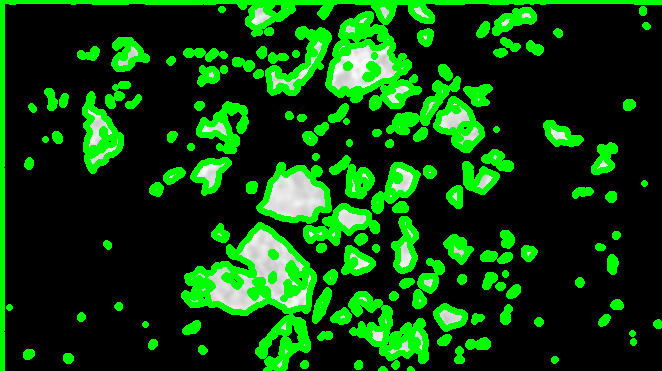

In [23]:
cv2_imshow(cv2.drawContours(final_result, contours, -1, (0, 255, 0), 3))

In [24]:
contours

[array([[[265, 369]],
 
        [[265, 370]],
 
        [[269, 370]],
 
        [[269, 369]]], dtype=int32), array([[[409, 368]],
 
        [[409, 370]],
 
        [[412, 370]],
 
        [[412, 369]],
 
        [[411, 368]]], dtype=int32), array([[[381, 368]],
 
        [[380, 369]],
 
        [[380, 370]],
 
        [[385, 370]],
 
        [[385, 369]],
 
        [[384, 368]]], dtype=int32), array([[[395, 362]],
 
        [[393, 364]],
 
        [[393, 366]],
 
        [[394, 367]],
 
        [[396, 367]],
 
        [[397, 366]],
 
        [[397, 362]]], dtype=int32), array([[[357, 362]],
 
        [[356, 363]],
 
        [[356, 367]],
 
        [[360, 367]],
 
        [[360, 362]]], dtype=int32), array([[[357, 365]],
 
        [[358, 364]],
 
        [[359, 365]],
 
        [[358, 366]]], dtype=int32), array([[[303, 362]],
 
        [[302, 363]],
 
        [[302, 366]],
 
        [[306, 366]],
 
        [[306, 362]]], dtype=int32), array([[[553, 358]],
 
        [[553, 361]],
 
    

In [25]:
len(allarea)

406

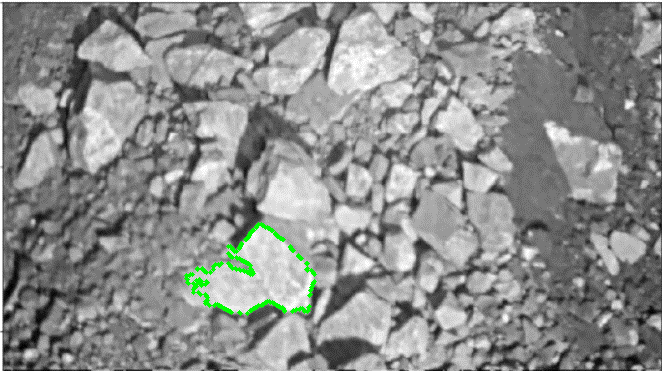

In [26]:
cv2_imshow(cv2.drawContours(orignal_img, contours[allarea.index(max(allarea))], -1, (0, 255, 0), 3)) 

In [27]:
print(max(allarea))

6460.0
